# Adultos (sin inconsistencias)

In [1]:
from IPython.display import display

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/con_inconsistencias/general/full.csv')
del df["Unnamed: 0"]

for element in ['fecha_reporte', 'fecha_evento', 'fecha_de_ultimo_avistamiento','fecha_de_ingreso',  'fecha_de_localizacion','fecha_probable_de_fallecimiento', 'fecha_de_nacimiento']:
    df[element] = pd.to_datetime(df[element],errors="coerce")

In [3]:
df = df[(df["edad"] > 17)].copy()

In [4]:
df['year_reporte'] = df['fecha_reporte'].dt.year
df['year_evento'] = df['fecha_evento'].dt.year
df["dias_de_busqueda_reporte"] = df["fecha_de_localizacion"] - df["fecha_reporte"]
df["dias_de_busqueda_evento"] = df["fecha_de_localizacion"] - df["fecha_evento"]
df['year_birthday'] = df['fecha_de_nacimiento'].dt.year
df["edad_calculada"] = df["year_reporte"] - df["year_birthday"]
df["dif_edad"] = df["edad_calculada"] - df["edad"]
df["tiempo_perdido"] = df["fecha_reporte"] - df["fecha_evento"]
df

,registro_nacional,fecha_reporte,fecha_evento,estado,clave_estado,municipio,clave_municipio,nacionalidad,estatus_migratorio,sexo,...,clasificacion_causal,causal,year_reporte,year_evento,dias_de_busqueda_reporte,dias_de_busqueda_evento,year_birthday,edad_calculada,dif_edad,tiempo_perdido
1,desaparecido,2012-03-01 10:00:00,2011-12-28 12:00:00,colima,6,villa_de_alvarez,10,mexicana,NaN,femenino,...,_,_,2012,2011.0,316 days 00:00:00,379 days 22:00:00,2000.0,12.0,-6.0,63 days 22:00:00
2,desaparecido,2011-12-19 11:20:00,2011-12-17 09:00:00,tlaxcala,29,la_magdalena_tlaltelulco,48,mexicana,no_especificado,masculino,...,accidentes,_,2011,2011.0,-1 days +00:40:00,1 days 03:00:00,2000.0,11.0,-13.0,2 days 02:20:00
4,desaparecido,2012-06-01 12:00:00,2012-05-01 11:15:00,colima,6,villa_de_alvarez,10,mexicana,NaN,femenino,...,_,_,2012,2012.0,-142 days +20:00:00,-111 days +20:45:00,2000.0,12.0,-14.0,31 days 00:45:00
9,desaparecido,2012-03-01 05:50:00,2011-12-27 07:00:00,colima,6,manzanillo,7,mexicana,NaN,masculino,...,_,_,2012,2011.0,NaT,NaT,2000.0,12.0,-15.0,64 days 22:50:00
10,desaparecido,2012-01-31 06:10:00,2012-01-23 02:00:00,colima,6,cuauhtemoc,5,mexicana,no_especificado,femenino,...,_,_,2012,2012.0,36 days 04:50:00,44 days 09:00:00,1993.0,19.0,0.0,8 days 04:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99118,desaparecido,2017-05-10 01:15:00,2017-04-10 06:00:00,jalisco,NaN,zapopan,NaN,mexicana,NaN,masculino,...,_,_,2017,2017.0,NaT,NaT,1992.0,25.0,-1.0,29 days 19:15:00
99120,desaparecido,2017-06-13 12:10:00,2017-10-06 12:00:00,jalisco,NaN,san_miguel_el_alto,NaN,mexicana,NaN,masculino,...,_,_,2017,2017.0,-6374 days +23:50:00,-6488 days +00:00:00,1989.0,28.0,0.0,-115 days +00:10:00
99121,desaparecido,2018-05-29 04:43:00,2018-05-27 12:00:00,colima,NaN,villa_de_alvarez,NaN,mexicana,NaN,masculino,...,_,_,2018,2018.0,-6723 days +07:17:00,-6721 days +00:00:00,1980.0,38.0,1.0,1 days 16:43:00
99122,desaparecido,2018-05-31 10:00:00,2018-05-28 07:30:00,puebla,NaN,puebla,NaN,mexicana,NaN,masculino,...,_,_,2018,2018.0,-6725 days +02:00:00,-6722 days +04:30:00,1994.0,24.0,0.0,3 days 02:30:00


In [5]:
df.edad.describe()

count    58618.000000
mean        35.008274
std         26.400571
min         18.000000
25%         23.000000
50%         31.000000
75%         42.000000
max       3454.000000
Name: edad, dtype: float64

In [6]:
df.drop(df[(df['edad'] > 99)].index, inplace=True)

In [7]:
df.edad_calculada.describe()

count    56324.000000
mean         9.888005
std         29.803406
min        -66.000000
25%         11.000000
50%         20.000000
75%         28.000000
max        256.000000
Name: edad_calculada, dtype: float64

In [8]:
df.year_evento.describe()

count    58599.000000
mean      2013.045905
std          3.266016
min       1972.000000
25%       2011.000000
50%       2013.000000
75%       2015.000000
max       2071.000000
Name: year_evento, dtype: float64

In [9]:
df.drop(df[(df['year_evento'] > 2018)].index, inplace=True)

In [10]:
df[(df['edad_calculada'] > 99)][['year_birthday','year_reporte','year_evento','edad','edad_calculada']].T

,14291,14292,14334,14337,14339,14340,14344,14351,14371,14372,...,47779,47791,47890,47969,48083,48085,55592,56033,57317,89937
year_birthday,1899.0,1899.0,1899.0,1899.0,1899.0,1899.0,1899.0,1899.0,1899.0,1899.0,...,1899.0,1899.0,1753.0,1753.0,1753.0,1753.0,1753.0,1753.0,1753.0,1753.0
year_reporte,2013.0,2013.0,2011.0,2013.0,2009.0,2009.0,2009.0,2009.0,2010.0,2010.0,...,2013.0,2011.0,2009.0,2008.0,2007.0,2007.0,2008.0,2008.0,2009.0,2008.0
year_evento,2013.0,2013.0,2011.0,2013.0,2009.0,2009.0,2009.0,2009.0,2010.0,2004.0,...,2013.0,2011.0,2008.0,2008.0,2007.0,2007.0,2008.0,2008.0,2009.0,2008.0
edad,27.0,23.0,25.0,19.0,50.0,39.0,18.0,44.0,25.0,37.0,...,40.0,18.0,23.0,19.0,19.0,19.0,24.0,27.0,55.0,47.0
edad_calculada,114.0,114.0,112.0,114.0,110.0,110.0,110.0,110.0,111.0,111.0,...,114.0,112.0,256.0,255.0,254.0,254.0,255.0,255.0,256.0,255.0


In [11]:
df.drop(df[(df['edad_calculada'] > 99)].index, inplace=True)

In [12]:
df.year_birthday.describe()

count    56232.000000
mean      2003.912737
std         29.015460
min       1973.000000
25%       1986.000000
50%       1994.000000
75%       2000.000000
max       2072.000000
Name: year_birthday, dtype: float64

In [13]:
df.drop(df[(df['year_birthday'] > 2018)].index, inplace=True)

In [14]:
df[(df['dif_edad'] < -2)][['year_birthday','year_reporte','year_evento','edad','edad_calculada', 'dif_edad']].T

,1,2,4,9,12,13,20,24,27,29,...,98925,98928,98932,98944,98946,98948,98979,98981,99023,99104
year_birthday,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,...,2000.0,2000.0,2000.0,1988.0,2000.0,2000.0,1978.0,2000.0,2003.0,2000.0
year_reporte,2012.0,2011.0,2012.0,2012.0,2012.0,2012.0,2012.0,2012.0,2011.0,2012.0,...,2016.0,2016.0,2016.0,2011.0,2016.0,2017.0,2018.0,2018.0,2018.0,2018.0
year_evento,2011.0,2011.0,2012.0,2011.0,2012.0,2012.0,2012.0,2011.0,2011.0,2012.0,...,2016.0,2016.0,2016.0,2011.0,2016.0,2017.0,2018.0,2018.0,2018.0,2018.0
edad,18.0,24.0,26.0,27.0,18.0,21.0,34.0,21.0,31.0,52.0,...,52.0,30.0,22.0,30.0,22.0,23.0,85.0,22.0,21.0,27.0
edad_calculada,12.0,11.0,12.0,12.0,12.0,12.0,12.0,12.0,11.0,12.0,...,16.0,16.0,16.0,23.0,16.0,17.0,40.0,18.0,15.0,18.0
dif_edad,-6.0,-13.0,-14.0,-15.0,-6.0,-9.0,-22.0,-9.0,-20.0,-40.0,...,-36.0,-14.0,-6.0,-7.0,-6.0,-6.0,-45.0,-4.0,-6.0,-9.0


In [15]:
df.drop(df[(df['dif_edad'] < -2)].index, inplace=True)

In [16]:
df[(df['edad_calculada'] < 18)][['year_birthday','year_reporte','year_evento','edad','edad_calculada', 'dif_edad']].T

,114,128,943,1602,1942,2425,3183,3870,4545,4974,...,93091,94275,94381,94943,97263,98000,98004,98228,98382,98612
year_birthday,1993.0,1993.0,1993.0,1993.0,1994.0,1993.0,1993.0,1996.0,1995.0,1994.0,...,2000.0,2000.0,2000.0,2000.0,2000.0,1999.0,2000.0,2000.0,2000.0,2000.0
year_reporte,2010.0,2010.0,2010.0,2010.0,2011.0,2010.0,2009.0,2012.0,2012.0,2011.0,...,2017.0,2017.0,2017.0,2017.0,2016.0,2016.0,2017.0,2017.0,2017.0,2017.0
year_evento,2010.0,2010.0,2010.0,2010.0,2011.0,2009.0,2009.0,2012.0,2012.0,2011.0,...,2017.0,2017.0,2017.0,2017.0,2016.0,2016.0,2017.0,2017.0,2017.0,2017.0
edad,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,19.0,18.0,19.0
edad_calculada,17.0,17.0,17.0,17.0,17.0,17.0,16.0,16.0,17.0,17.0,...,17.0,17.0,17.0,17.0,16.0,17.0,17.0,17.0,17.0,17.0
dif_edad,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,-1.0,-2.0,-1.0,-2.0


In [17]:
df.year_evento.value_counts()

2017.0    4857
2014.0    4503
2016.0    4393
2015.0    4326
2013.0    3553
2011.0    2919
2012.0    2765
2010.0    1833
2018.0    1307
2009.0    1045
2008.0     688
2007.0     531
2000.0     313
2006.0      62
2005.0      21
2002.0       9
2003.0       8
1999.0       6
2001.0       5
1998.0       4
2004.0       4
1996.0       2
1993.0       1
1989.0       1
1977.0       1
1991.0       1
1985.0       1
1986.0       1
1982.0       1
1997.0       1
1990.0       1
Name: year_evento, dtype: int64

In [18]:
df[(df['year_evento'] < 2001)][['year_birthday','year_reporte','year_evento','edad','edad_calculada', 'dif_edad']].T

,172,409,1431,1437,1522,1561,1569,2151,2153,2328,...,86029,91106,91115,91117,91167,91172,91231,91232,91966,98123
year_birthday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1992.0,1981.0,1988.0,1980.0,1986.0,1990.0,1980.0,1987.0,1990.0,1975.0
year_reporte,2008.0,2011.0,2011.0,2011.0,2011.0,2011.0,2011.0,2007.0,2007.0,2011.0,...,2017.0,2013.0,2013.0,2013.0,2013.0,2013.0,2013.0,2013.0,2016.0,2017.0
year_evento,2000.0,1989.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,...,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
edad,56.0,33.0,30.0,25.0,22.0,23.0,21.0,44.0,44.0,25.0,...,25.0,32.0,24.0,33.0,26.0,23.0,33.0,22.0,19.0,42.0
edad_calculada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.0,32.0,25.0,33.0,27.0,23.0,33.0,26.0,26.0,42.0
dif_edad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,7.0,0.0


In [19]:
df[(df['dif_edad'] > 1)][['year_birthday','year_reporte','year_evento','edad','edad_calculada', 'dif_edad']].T

,77,359,398,511,526,727,795,918,1072,1082,...,98674,98679,98696,98700,98795,98834,98846,98982,99041,99082
year_birthday,1982.0,1973.0,1974.0,1990.0,1985.0,1986.0,1981.0,1983.0,1975.0,1983.0,...,1976.0,1978.0,1991.0,1996.0,1983.0,1986.0,1994.0,1993.0,1983.0,1989.0
year_reporte,2011.0,2007.0,2010.0,2011.0,2011.0,2010.0,2009.0,2012.0,2010.0,2009.0,...,2017.0,2018.0,2018.0,2018.0,2018.0,2017.0,2017.0,2018.0,2018.0,2018.0
year_evento,2011.0,2007.0,2010.0,NaN,2011.0,2010.0,2009.0,2011.0,2010.0,2009.0,...,2017.0,2018.0,2018.0,2018.0,2018.0,2010.0,2017.0,2018.0,2016.0,2018.0
edad,27.0,23.0,34.0,18.0,24.0,21.0,25.0,26.0,31.0,23.0,...,34.0,38.0,25.0,20.0,33.0,23.0,21.0,23.0,33.0,27.0
edad_calculada,29.0,34.0,36.0,21.0,26.0,24.0,28.0,29.0,35.0,26.0,...,41.0,40.0,27.0,22.0,35.0,31.0,23.0,25.0,35.0,29.0
dif_edad,2.0,11.0,2.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,...,7.0,2.0,2.0,2.0,2.0,8.0,2.0,2.0,2.0,2.0


In [20]:
df['year_birthday'] =  df['year_birthday'].fillna('0')

In [21]:
df.year_birthday.value_counts()

0         2276
1990.0    1662
1992.0    1620
1993.0    1613
1989.0    1530
1994.0    1518
1995.0    1477
1991.0    1469
1985.0    1378
1988.0    1360
1987.0    1328
1986.0    1230
1984.0    1166
1983.0    1162
1980.0    1158
1996.0    1153
1982.0    1146
1981.0    1035
1979.0    1031
1975.0     965
1977.0     919
1978.0     914
1976.0     887
1974.0     801
1973.0     779
1997.0     760
1998.0     523
1999.0     223
2000.0      81
Name: year_birthday, dtype: int64

In [22]:
df.drop(df[(df['year_birthday'] == "0")].index, inplace=True)

In [23]:
df.drop(df[(df['dif_edad'] > 1)].index, inplace=True)

In [24]:
df[(df['year_reporte'] < 2006)][['year_birthday','year_reporte','year_evento','edad','edad_calculada', 'dif_edad']].T

""
year_birthday
year_reporte
year_evento
edad
edad_calculada
dif_edad


In [25]:
df[(df['year_evento'] == 2000)][['year_birthday','year_reporte','year_evento','edad','edad_calculada', 'dif_edad']].T

,5997,10894,12678,12690,13369,16411,16414,16437,16448,16680,...,84565,85817,86029,91106,91115,91117,91167,91172,91231,98123
year_birthday,1979.0,1973.0,1986.0,1983.0,1978.0,1978.0,1993.0,1988.0,1993.0,1984.0,...,1978.0,1991.0,1992.0,1981.0,1988.0,1980.0,1986.0,1990.0,1980.0,1975.0
year_reporte,2008,2013,2013,2013,2008,2013,2013,2013,2013,2013,...,2017,2017,2017,2013,2013,2013,2013,2013,2013,2017
year_evento,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,...,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
edad,29.0,40.0,26.0,29.0,30.0,35.0,21.0,24.0,19.0,29.0,...,39.0,25.0,25.0,32.0,24.0,33.0,26.0,23.0,33.0,42.0
edad_calculada,29.0,40.0,27.0,30.0,30.0,35.0,20.0,25.0,20.0,29.0,...,39.0,26.0,25.0,32.0,25.0,33.0,27.0,23.0,33.0,42.0
dif_edad,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [26]:
df[(df['edad_calculada'] < 17)][['year_birthday','year_reporte','year_evento','edad','edad_calculada', 'dif_edad']].T

,3183,3870,6450,6458,6466,6489,6639,7014,7170,8730,...,79036,81294,81903,82671,84753,89849,89879,90274,90587,97263
year_birthday,1993.0,1996.0,1995.0,1995.0,1995.0,1995.0,1995.0,1996.0,1995.0,1995.0,...,1995.0,2000.0,2000.0,2000.0,2000.0,1993.0,1993.0,1995.0,1994.0,2000.0
year_reporte,2009,2012,2011,2011,2011,2011,2011,2012,2011,2011,...,2011,2016,2016,2016,2016,2009,2009,2011,2010,2016
year_evento,2009.0,2012.0,2011.0,2011.0,2011.0,2011.0,2011.0,2012.0,2010.0,2011.0,...,2010.0,2016.0,2016.0,2016.0,2016.0,2009.0,2009.0,2011.0,2010.0,2016.0
edad,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
edad_calculada,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,...,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
dif_edad,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


In [27]:
df.drop(df[(df['edad_calculada'] < 17)].index, inplace=True)

## Al final quedamos con:

In [28]:
len(df)

29603

## EDA

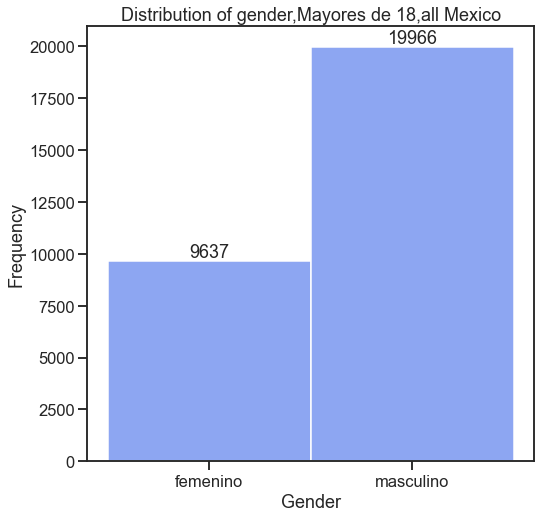

In [29]:
plt.figure(figsize=(8, 8))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Distribution of gender,Mayores de 18,all Mexico')

ax = sns.histplot(df.sexo)
ax.bar_label(ax.containers[0])

plt.show()

Text(0.5, 1.0, 'Presuntas Edades')

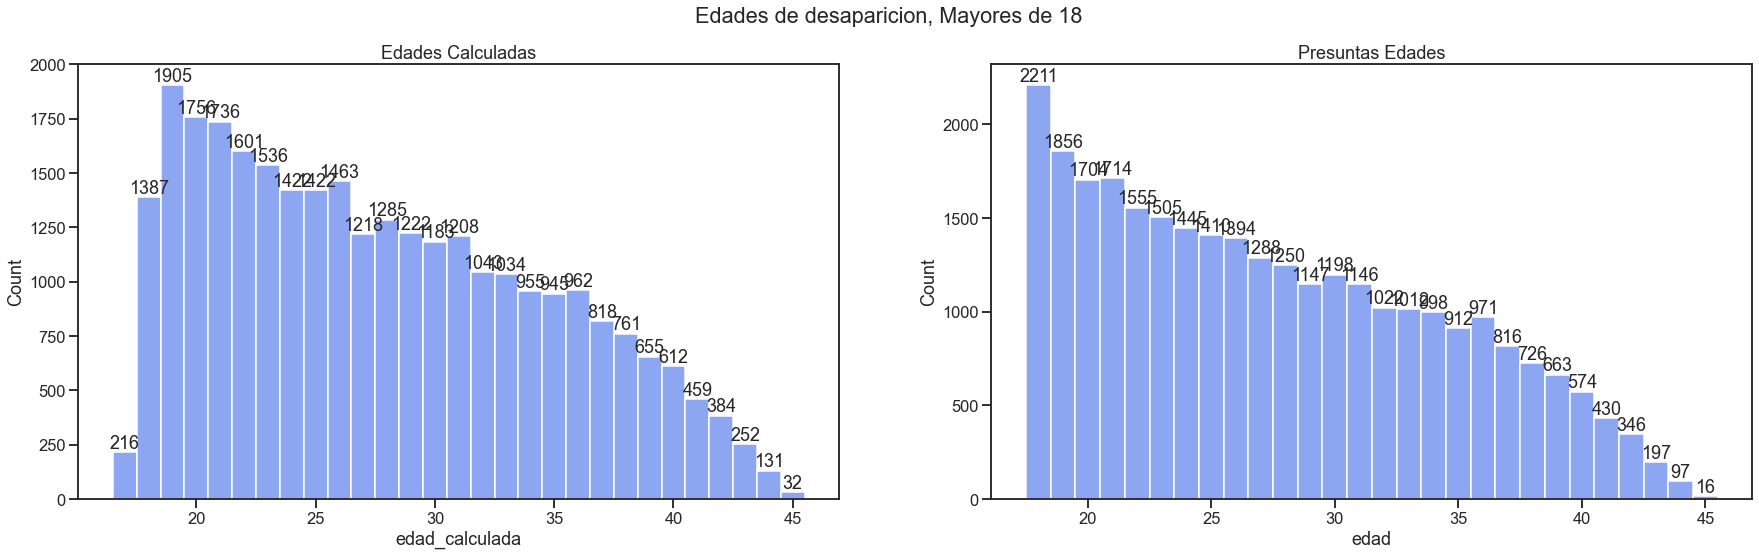

In [30]:
fig, axs = plt.subplots(1, 2,figsize=(30,8))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")

fig.suptitle('Edades de desaparicion, Mayores de 18')

plotUno = sns.histplot(df.edad_calculada,discrete='True',ax=axs[0])
plotUno.bar_label(plotUno.containers[0])
axs[0].set_title('Edades Calculadas')

plotDos = sns.histplot(df.edad,discrete='True',ax=axs[1])
plotDos.bar_label(plotDos.containers[0])
axs[1].set_title('Presuntas Edades')

In [31]:
df.edad_calculada.value_counts().head()

19.0    1905
20.0    1756
21.0    1736
22.0    1601
23.0    1536
Name: edad_calculada, dtype: int64

In [32]:
df.edad.value_counts().head()

18.0    2211
19.0    1856
21.0    1714
20.0    1704
22.0    1555
Name: edad, dtype: int64

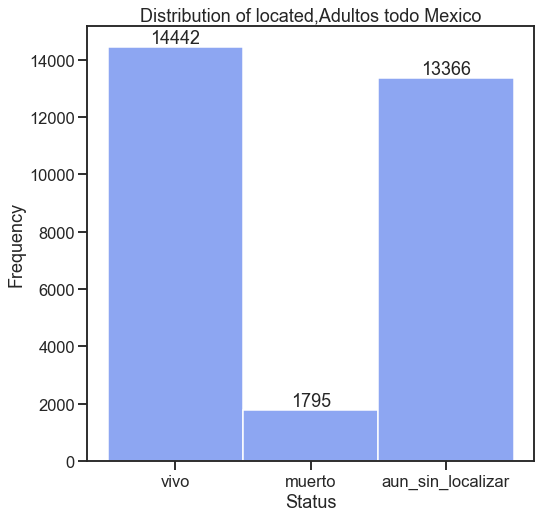

In [33]:
plt.figure(figsize=(8, 8))

sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Status')
plt.title('Distribution of located,Adultos todo Mexico')

ax = sns.histplot(df.vivo_o_muerto)
ax.bar_label(ax.containers[0])

plt.show()

In [34]:
df[(df["sexo"]=="femenino")].vivo_o_muerto.value_counts()

vivo                 6693
aun_sin_localizar    2727
muerto                217
Name: vivo_o_muerto, dtype: int64

In [35]:
df[(df["sexo"]=="masculino")].vivo_o_muerto.value_counts()

aun_sin_localizar    10639
vivo                  7749
muerto                1578
Name: vivo_o_muerto, dtype: int64

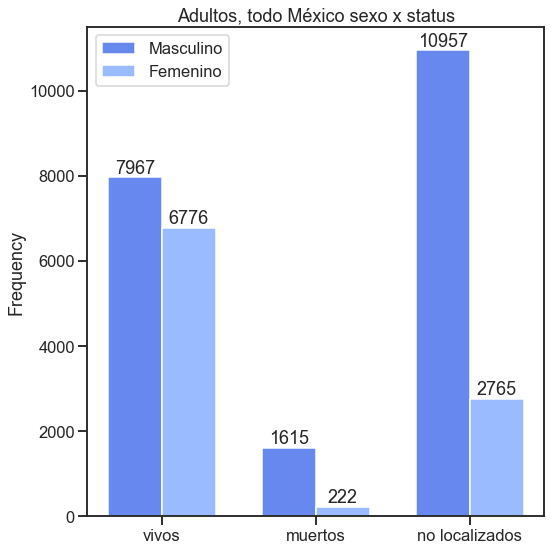

In [36]:
labels = ['vivos', 'muertos', 'no localizados']
men_means = [7967,1615,10957]
women_means = [6776, 222, 2765]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(8,8))
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Adultos, todo México sexo x status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0), #(offset x, offset y)
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [37]:
df.posible_causa_desaparicion.value_counts().head(20)

no_especificado                               1744
-1                                            1392
otros_causas                                  1188
problemas_en_su_casa                           464
problemas_familiares                           368
forzosa                                        351
se_fue_de_fiesta_con_amigos                    313
se_fue_con_su_novio                            302
se_desconoce                                   215
homicidio_doloso                               192
se_fue_a_trabajar_a_otro_estado                163
sin_dato                                       135
rebeldia                                       131
padece_de_sus_facultades                       130
por_su_propia_voluntad                         107
se_fue_con_el_novio                             64
no_especificado_por_la_persona_que_declara      56
problemas_personales                            53
se_ignora                                       51
se_fue_por_su_voluntad         

In [38]:
df.condicion_encontrado.value_counts()

no_especificado                            8259
buen_estado_de_salud                       6522
tiro_de_gracia                              380
sin_dato                                    292
descomposición                              239
golpes                                      230
asfixia                                      32
quemado_(no_es_lo_mismo_que_quemaduras)      32
mutilado                                     30
decapitado                                   29
apuñalamiento                                26
atropellamiento                              21
ahorcamiento                                 20
ahogamiento                                  19
atado_de_pies_y_manos                        19
maniatado                                    12
asfixia_por_estrangulamiento                 10
cortes                                       10
violación                                    10
amordazado                                    9
quemaduras                              

In [39]:
df.relacion_con_grupos_delictivos.value_counts()

no    29144
si      459
Name: relacion_con_grupos_delictivos, dtype: int64

In [40]:
df[(df["relacion_con_grupos_delictivos"] == "si")].sexo.value_counts()

masculino    380
femenino      79
Name: sexo, dtype: int64

In [41]:
df[(df["relacion_con_grupos_delictivos"] == "si") & (df["sexo"]=="masculino")].edad.value_counts().head()

31.0    27
22.0    24
21.0    22
23.0    22
18.0    21
Name: edad, dtype: int64

In [42]:
df[(df["relacion_con_grupos_delictivos"] == "si") & (df["sexo"]=="femenino")].edad.value_counts().head()

18.0    14
19.0     8
21.0     8
20.0     6
27.0     4
Name: edad, dtype: int64

## Exploración por condición: Tiro de Gracia

In [43]:
df[(df["condicion_encontrado"] == "tiro_de_gracia")].edad.value_counts().head()

21.0    25
24.0    25
25.0    24
34.0    22
30.0    21
Name: edad, dtype: int64

In [44]:
df[(df["condicion_encontrado"] == "tiro_de_gracia")].sexo.value_counts()

masculino    361
femenino      19
Name: sexo, dtype: int64

In [45]:
df[(df["condicion_encontrado"] == "tiro_de_gracia")].estado.value_counts()

sinaloa            318
guerrero            15
guanajuato          12
chihuahua           10
zacatecas            5
nuevo_leon           5
jalisco              4
colima               3
michoacan            2
tlaxcala             1
tamaulipas           1
mexico               1
baja_california      1
queretaro            1
hidalgo              1
Name: estado, dtype: int64

In [46]:
df[(df["condicion_encontrado"] == "tiro_de_gracia")].posible_causa_desaparicion.value_counts().head(20)

homicidio_doloso                                                                                                               154
-1                                                                                                                              34
desconocido                                                                                                                     13
homicidio_por_arma_de_fuego                                                                                                     12
fue_privado_de_la_vida                                                                                                           3
privado_de_la_libertad                                                                                                           2
no_especificado                                                                                                                  2
localizado_occiso                                                                  

In [47]:
df[(df["condicion_encontrado"] == "tiro_de_gracia")].relacion_con_grupos_delictivos.value_counts()

no    379
si      1
Name: relacion_con_grupos_delictivos, dtype: int64

## Exploración por fallecimiento, ya que es el dataset que más muertes presenta

In [48]:
df.fecha_probable_de_fallecimiento.value_counts()

2000-01-01    301
2013-10-19      5
2017-04-04      4
2016-09-25      4
2012-09-03      4
             ... 
2009-07-12      1
2009-07-14      1
2009-02-27      1
2008-10-29      1
2017-10-19      1
Name: fecha_probable_de_fallecimiento, Length: 491, dtype: int64

In [49]:
df.fecha_evento.value_counts()

2000-01-01 12:00:00    177
2010-03-17 12:00:00     14
2010-05-04 12:00:00     13
2014-04-20 12:00:00     12
2000-01-01 10:00:00     11
                      ... 
2015-02-18 03:00:00      1
2013-08-21 07:54:58      1
2011-11-05 06:00:00      1
2015-03-13 04:00:00      1
2018-05-28 07:30:00      1
Name: fecha_evento, Length: 20997, dtype: int64

In [50]:
df["dias_hasta_fallecimiento"] = df["fecha_probable_de_fallecimiento"] - df["fecha_evento"]
df.dias_hasta_fallecimiento.value_counts().head(25)

-1 days +12:00:00    17
0 days 12:00:00      14
30 days 12:00:00      7
2 days 12:00:00       7
-1 days +22:00:00     7
0 days 16:00:00       6
-1 days +15:00:00     6
-1 days +13:00:00     6
29 days 12:00:00      6
4 days 12:00:00       5
-1 days +16:00:00     5
60 days 12:00:00      5
3 days 12:00:00       5
0 days 16:30:00       4
1 days 12:00:00       4
-1 days +17:00:00     4
1 days 14:00:00       4
2 days 17:00:00       4
8 days 12:30:00       4
0 days 23:00:00       4
0 days 19:00:00       3
-1 days +18:00:00     3
162 days 16:45:00     3
-1 days +21:00:00     3
5 days 13:00:00       3
Name: dias_hasta_fallecimiento, dtype: int64

In [51]:
df[df["vivo_o_muerto"] == "muerto"].tiempo_perdido.value_counts().head(25)

0 days 00:00:00      43
1 days 00:00:00      30
2 days 00:00:00      22
3 days 00:00:00      17
0 days 01:00:00      11
92 days 00:00:00     10
5 days 00:00:00      10
31 days 00:00:00      9
61 days 00:00:00      7
30 days 00:00:00      6
4 days 00:00:00       6
7 days 00:00:00       6
10 days 00:00:00      4
60 days 13:56:56      4
2 days 23:15:00       4
91 days 03:03:12      3
-1 days +19:00:00     3
1 days 09:00:00       3
2 days 03:00:00       3
1 days 06:01:00       3
91 days 19:42:00      3
61 days 03:30:00      3
150 days 17:20:00     3
1 days 10:00:00       3
91 days 00:00:00      3
Name: tiempo_perdido, dtype: int64

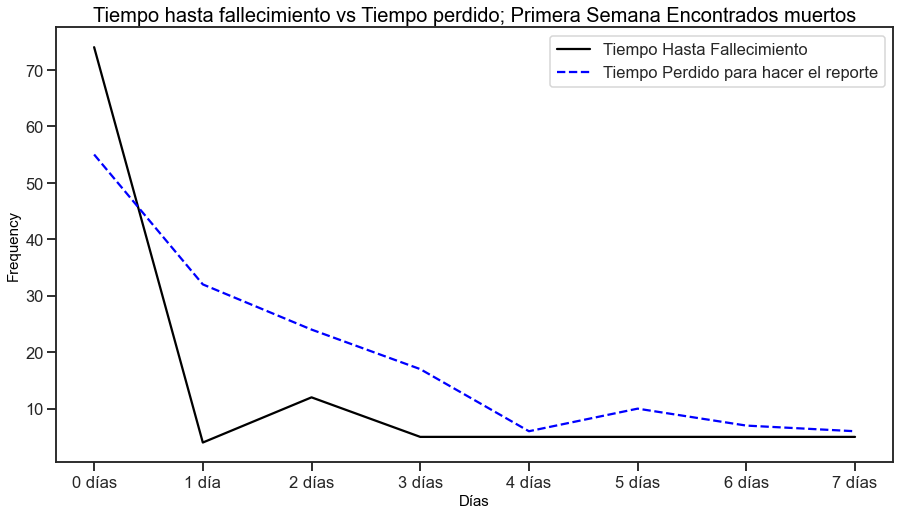

In [52]:
labelsRv = ["0 días", "1 día", "2 días", "3 días", "4 días", "5 días", "6 días", "7 días"]
valuesRv = [74, 4, 12, 5,5, 5, 5,5]


labelsEv = ["0 días", "1 día", "2 días", "3 días", "4 días", "5 días", "6 días", "7 días"]
valuesEv = [55,32, 24,17, 6, 10, 7, 6]

plt.figure(figsize=(15, 8))

plt.plot(labelsRv,valuesRv,color='black',linestyle='solid', label="Tiempo Hasta Fallecimiento")
plt.plot(labelsEv,valuesEv,color='blue',linestyle='dashed', label="Tiempo Perdido para hacer el reporte")
plt.legend(loc="upper right")

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('Días',fontdict=font2)
plt.title('Tiempo hasta fallecimiento vs Tiempo perdido; Primera Semana Encontrados muertos', fontdict=font1)

plt.show()

## Tiempos de busqueda Masculino

In [53]:
df[(df["sexo"] == "masculino")].tiempo_perdido.value_counts().head(15)

0 days      621
1 days      302
2 days      277
3 days      177
31 days     124
4 days      112
61 days     106
5 days       97
30 days      77
92 days      67
6 days       60
7 days       40
62 days      28
91 days      27
122 days     27
Name: tiempo_perdido, dtype: int64

In [54]:
df[(df["sexo"] == "masculino")].dias_de_busqueda_reporte.value_counts().head(15)

0 days 00:00:00         346
1 days 00:00:00          85
20 days 00:00:00         81
2 days 00:00:00          58
31 days 00:00:00         38
4 days 00:00:00          29
-3772 days +00:00:00     27
-6757 days +00:00:00     24
3 days 00:00:00          23
0 days 03:00:00          22
6 days 00:00:00          22
0 days 02:00:00          22
30 days 00:00:00         21
7 days 00:00:00          19
-6628 days +00:00:00     18
Name: dias_de_busqueda_reporte, dtype: int64

In [55]:
df[(df["sexo"] == "masculino")].dias_de_busqueda_evento.value_counts().head(15)

0 days 00:00:00     106
2 days 00:00:00      75
1 days 00:00:00      65
3 days 00:00:00      47
4 days 00:00:00      37
31 days 00:00:00     36
5 days 00:00:00      35
30 days 00:00:00     33
61 days 00:00:00     29
6 days 00:00:00      28
1 days 02:00:00      25
7 days 00:00:00      24
8 days 00:00:00      24
92 days 00:00:00     24
2 days 04:00:00      19
Name: dias_de_busqueda_evento, dtype: int64

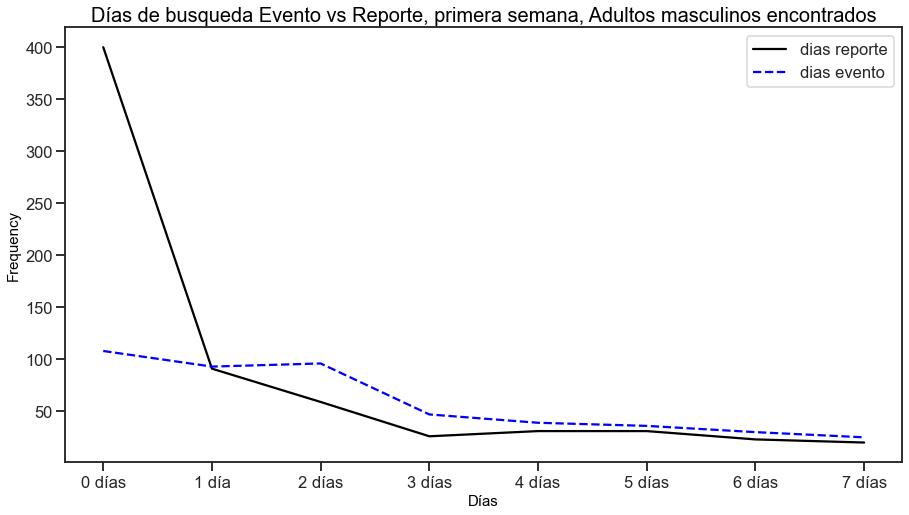

In [56]:
labelsRv = ["0 días", "1 día", "2 días", "3 días", "4 días", "5 días", "6 días", "7 días"]
valuesRv = [400, 91, 59, 26,31, 31, 23,20]


labelsEv = ["0 días", "1 día", "2 días", "3 días", "4 días", "5 días", "6 días", "7 días"]
valuesEv = [108,93, 96,47,39,36 , 30, 25]

plt.figure(figsize=(15, 8))

plt.plot(labelsRv,valuesRv,color='black',linestyle='solid', label="dias reporte")
plt.plot(labelsEv,valuesEv,color='blue',linestyle='dashed', label="dias evento")
plt.legend(loc="upper right")

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('Días',fontdict=font2)
plt.title('Días de busqueda Evento vs Reporte, primera semana, Adultos masculinos encontrados', fontdict=font1)

plt.show()

## Tiempos de Busqueda, Femenino

In [57]:
df[(df["sexo"] == "femenino")].tiempo_perdido.value_counts().head(15)

0 days      406
1 days      266
3 days      140
2 days      140
31 days     132
4 days       78
61 days      69
30 days      58
5 days       58
92 days      43
6 days       36
122 days     26
8 days       23
91 days      22
7 days       20
Name: tiempo_perdido, dtype: int64

In [58]:
df[(df["sexo"] == "femenino")].dias_de_busqueda_reporte.value_counts().head(15)

0 days 00:00:00     245
1 days 00:00:00      78
2 days 00:00:00      49
20 days 00:00:00     35
3 days 00:00:00      29
31 days 00:00:00     24
5 days 00:00:00      24
4 days 00:00:00      24
30 days 00:00:00     20
61 days 00:00:00     20
6 days 00:00:00      19
0 days 02:00:00      15
0 days 01:00:00      13
1 days 04:00:00      13
0 days 07:00:00      13
Name: dias_de_busqueda_reporte, dtype: int64

In [59]:
df[(df["sexo"] == "femenino")].dias_de_busqueda_evento.value_counts().head(15)

0 days 00:00:00      136
1 days 00:00:00       59
2 days 00:00:00       50
3 days 00:00:00       46
5 days 00:00:00       43
31 days 00:00:00      33
61 days 00:00:00      30
4 days 00:00:00       24
6 days 00:00:00       22
30 days 00:00:00      19
122 days 00:00:00     18
8 days 00:00:00       17
92 days 00:00:00      16
7 days 00:00:00       16
1 days 01:00:00       14
Name: dias_de_busqueda_evento, dtype: int64

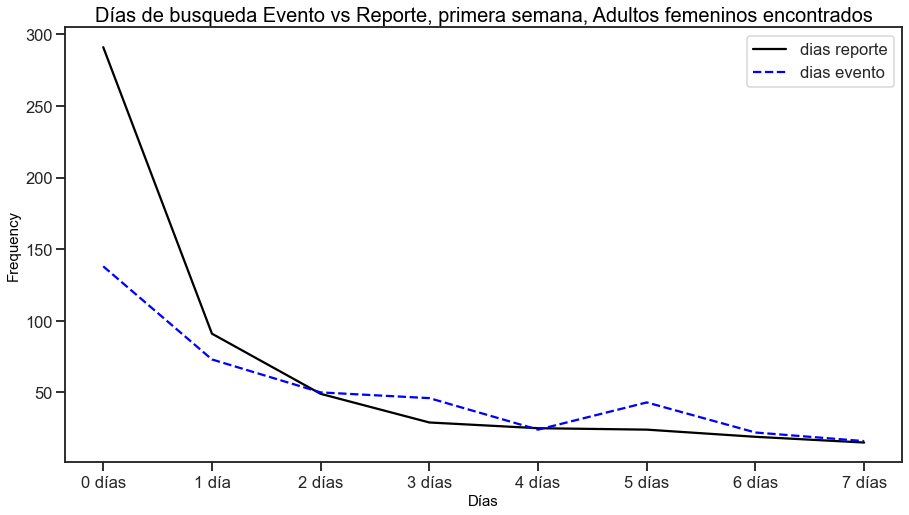

In [60]:
labelsRv = ["0 días", "1 día", "2 días", "3 días", "4 días", "5 días", "6 días", "7 días"]
valuesRv = [291, 91, 49, 29,25, 24, 19,15]


labelsEv = ["0 días", "1 día", "2 días", "3 días", "4 días", "5 días", "6 días", "7 días"]
valuesEv = [138,73,50,46,24,43, 22, 16]

plt.figure(figsize=(15, 8))

plt.plot(labelsRv,valuesRv,color='black',linestyle='solid', label="dias reporte")
plt.plot(labelsEv,valuesEv,color='blue',linestyle='dashed', label="dias evento")
plt.legend(loc="upper right")

font1 = {'family':'sans-serif','color':'black','size':20}
font2 = {'family':'sans-serif','color':'black','size':15}

plt.ylabel('Frequency',fontdict=font2)
plt.xlabel('Días',fontdict=font2)
plt.title('Días de busqueda Evento vs Reporte, primera semana, Adultos femeninos encontrados', fontdict=font1)

plt.show()

## Situación general por año

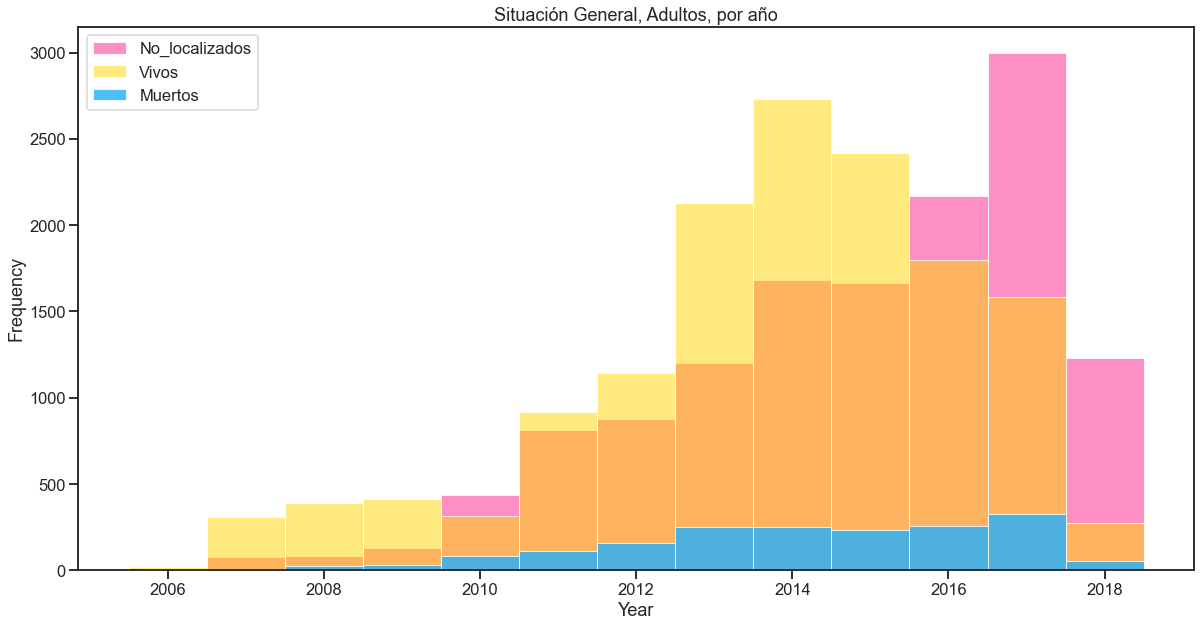

In [61]:
plt.figure(figsize=(20,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(df[(df["vivo_o_muerto"] == "aun_sin_localizar" )].year_reporte, label='No_localizados', alpha=0.5,linewidth=.8,discrete="true",color="#fe218b")
sns.histplot(df[(df["vivo_o_muerto"] == "vivo" )].year_reporte,label='Vivos', alpha=0.5,linewidth=.8,discrete="true",color="#fed700")
sns.histplot(df[(df["vivo_o_muerto"] == "muerto" )].year_reporte, label='Muertos', alpha=0.8,linewidth=.8,discrete="true", color="#21b0fe")

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Year')
plt.title('Situación General, Adultos, por año')

plt.show()

## Data to make another Data Set to Dashboards

In [62]:
df.estado.value_counts()

guanajuato             4608
mexico                 3785
sinaloa                3526
chihuahua              2278
nuevo_leon             2130
jalisco                1968
tamaulipas             1574
puebla                 1353
guerrero               1309
sonora                  789
colima                  732
baja_california         709
chiapas                 656
aguascalientes          590
queretaro               497
coahuila                490
veracruz                453
durango                 377
quintana_roo            319
zacatecas               304
michoacan               299
yucatan                 182
hidalgo                 167
campeche                 95
oaxaca                   84
morelos                  70
nayarit                  69
tlaxcala                 52
san_luis_potosi          41
ciudad_de_mexico         31
tabasco                  31
baja_california_sur      25
no_especificado           8
texas                     2
Name: estado, dtype: int64

In [63]:
import scipy.stats as stats
stats.zscore(df.estado.value_counts())

guanajuato             3.231041
mexico                 2.519530
sinaloa                2.295616
chihuahua              1.216678
nuevo_leon             1.088727
jalisco                0.948673
tamaulipas             0.608047
puebla                 0.416985
guerrero               0.378945
sonora                -0.070612
colima                -0.119890
baja_california       -0.139775
chiapas               -0.185595
aguascalientes        -0.242654
queretaro             -0.323056
coahuila              -0.329108
veracruz              -0.361095
durango               -0.426800
quintana_roo          -0.476943
zacatecas             -0.489911
michoacan             -0.494233
yucatan               -0.595384
hidalgo               -0.608352
campeche              -0.670598
oaxaca                -0.680108
morelos               -0.692212
nayarit               -0.693076
tlaxcala              -0.707773
san_luis_potosi       -0.717283
ciudad_de_mexico      -0.725928
tabasco               -0.725928
baja_cal

In [ ]:
df.rename(columns = {'estado_(localizado)':'estado_localizado'}, inplace = True)
df['estado_localizado']= df['estado_localizado'].replace('estado_de_mexico','mexico')
df.to_csv('adultos.csv', index=False)